# Effect of correlated features

In [1]:
# Import necessary libraries for the whole notebook
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load and prepare the Iris dataset (binary classification)
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

variety_to_exclude = 0   # We need to explude one of the three varieties

# Keep only two classes
X = X[y != variety_to_exclude]
y = y[y != variety_to_exclude]

X = pd.DataFrame(X, columns=feature_names)


/home/nnieto/Nico/Cursos/.courses/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Create correlated copies of existing features
new_features = 10
for new_feature in range(new_features):
    X[f'petal length_corr{new_feature}'] = X['petal length (cm)'] * 0.99 + np.random.normal(0, 0.1, len(X))



# Add a highly correlated pair
# X['petal area'] = X['petal length (cm)'] * X['petal width (cm)']
# X['petal area approx'] = X['petal area'] * 0.95 + np.random.normal(0, 0.05, len(X))

print("New feature correlations:")
corr_matrix = X.corr()
styled_corr = corr_matrix.style.background_gradient(cmap='coolwarm', axis=None)
display(styled_corr)  # Use display() instead of print()


New feature correlations:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length_corr0,petal length_corr1,petal length_corr2,petal length_corr3,petal length_corr4,petal length_corr5,petal length_corr6,petal length_corr7,petal length_corr8,petal length_corr9
sepal length (cm),1.000000,0.553855,0.828479,0.593709,0.832539,0.829877,0.824102,0.805532,0.823265,0.832877,0.818430,0.830670,0.819269,0.828474
sepal width (cm),0.553855,1.000000,0.519802,0.566203,0.518566,0.505494,0.520509,0.499107,0.515130,0.523767,0.527411,0.507247,0.508718,0.538924
petal length (cm),0.828479,0.519802,1.000000,0.823348,0.993747,0.994391,0.993098,0.992682,0.993176,0.992801,0.994229,0.993752,0.993193,0.993236
petal width (cm),0.593709,0.566203,0.823348,1.000000,0.807163,0.814211,0.822199,0.811171,0.816526,0.817757,0.831793,0.817233,0.809261,0.823066
petal length_corr0,0.832539,0.518566,0.993747,0.807163,1.000000,0.988285,0.987410,0.983106,0.986865,0.984849,0.987533,0.987354,0.987106,0.987227
petal length_corr1,0.829877,0.505494,0.994391,0.814211,0.988285,1.000000,0.987271,0.988667,0.990205,0.986071,0.987755,0.988040,0.986964,0.986673
petal length_corr2,0.824102,0.520509,0.993098,0.822199,0.987410,0.987271,1.000000,0.984050,0.985996,0.986357,0.988966,0.988156,0.985952,0.984313
petal length_corr3,0.805532,0.499107,0.992682,0.811171,0.983106,0.988667,0.984050,1.000000,0.986349,0.982534,0.986241,0.986941,0.988592,0.985453
petal length_corr4,0.823265,0.515130,0.993176,0.816526,0.986865,0.990205,0.985996,0.986349,1.000000,0.983713,0.985815,0.988054,0.987514,0.986794
petal length_corr5,0.832877,0.523767,0.992801,0.817757,0.984849,0.986071,0.986357,0.982534,0.983713,1.000000,0.987477,0.986684,0.985257,0.984392


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train models
lr_raw = LogisticRegression(max_iter=100, random_state=42).fit(X_train, y_train)

# Check performance
print("Raw Data - Train accuracy:", lr_raw.score(X_train, y_train))
print("Raw Data - Test accuracy:", lr_raw.score(X_test, y_test))

Raw Data - Train accuracy: 0.9857142857142858
Raw Data - Test accuracy: 0.8333333333333334


In [4]:
# SHAP explainers for both models
explainer_lr_raw = shap.LinearExplainer(lr_raw, X_train, feature_names=feature_names)

# compute SHAP values
shap_values_explanation = explainer_lr_raw(X_test)

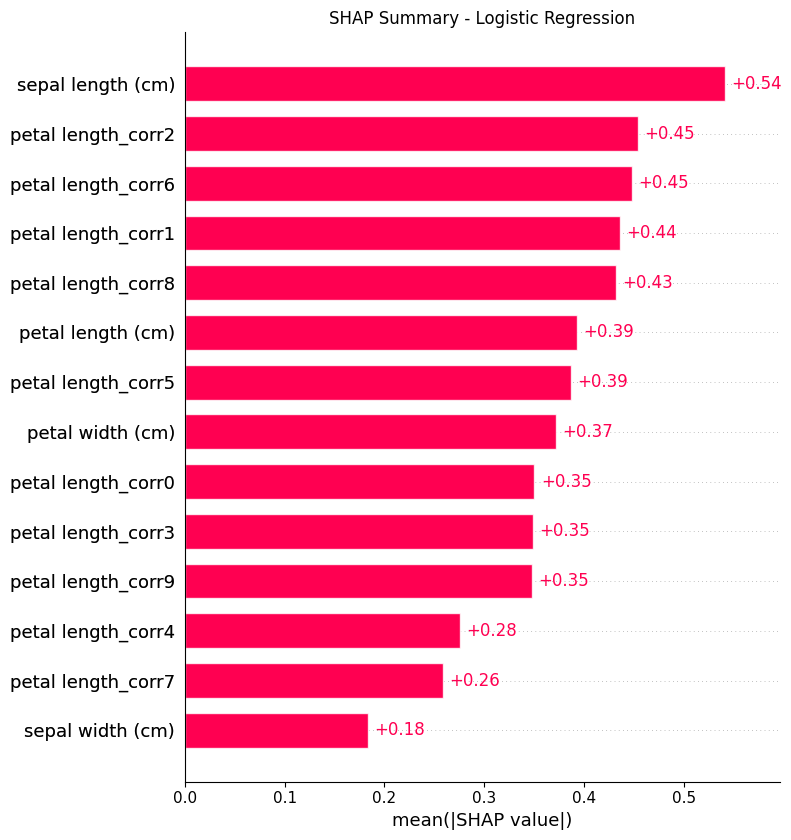

In [5]:
# Raw data summary plot
plt.figure()
# compute SHAP values
shap.plots.bar(shap_values_explanation, max_display=14, show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()


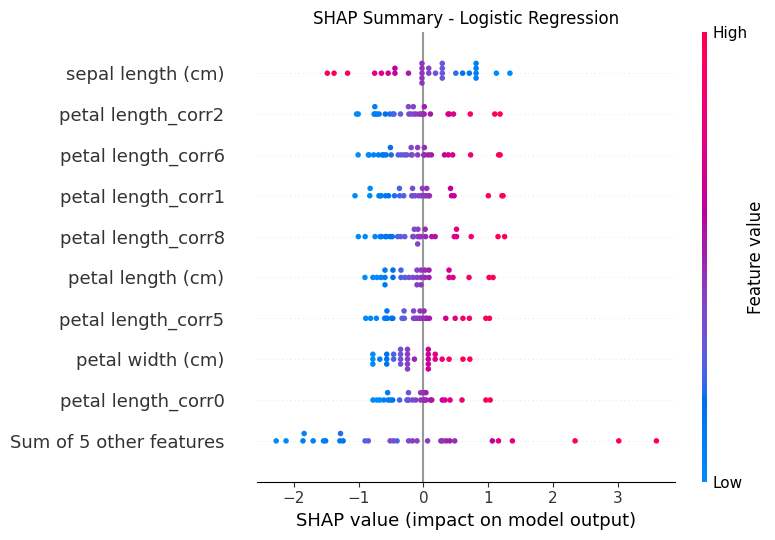

In [6]:
# Raw data summary plot
plt.figure()
shap.plots.beeswarm(shap_values_explanation, show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.tight_layout()
plt.show()
